In [9]:
from surprise import KNNWithMeans, KNNBasic, KNNWithZScore, SVD, KNNBaseline, SVDpp, NormalPredictor, NMF, BaselineOnly, CoClustering
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection.validation import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise.prediction_algorithms.slope_one import SlopeOne
import surprise

In [7]:
import pandas as pd

In [3]:
# Load the movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

Посмотрим, как хорошо и как долго будут обучаться алгоритмы surprise. (на основе [статьи](https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b))

In [4]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), 
                  KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Don

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.920175,205.877092,4.256399
KNNBaseline,0.929987,0.684560,4.866551
SVD,0.936211,4.932748,0.180084
BaselineOnly,0.943723,0.245435,0.193558
SlopeOne,0.944867,1.086065,3.901078
KNNWithZScore,0.950542,0.508929,3.836990
KNNWithMeans,0.951875,0.439536,3.715880
NMF,0.961467,6.917553,0.272968
CoClustering,0.971158,2.100536,0.210492


Посмотрим, можно ли совместить алгоритмы. (на основе [статьи](https://www.kaggle.com/robottums/hybrid-recommender-systems-with-surprise/execution))

In [21]:
import surprise
from surprise import PredictionImpossible
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import os
print(os.listdir("../data_small"))

['links.csv', '.DS_Store', 'tags.csv', 'ratings.csv', 'README.txt', 'movies.csv']


In [3]:
raw=pd.read_csv('../data_small/ratings.csv')
raw.drop_duplicates(inplace=True)
print('we have',raw.shape[0], 'ratings')
print('the number of unique users we have is:', len(raw.userId.unique()))
print('the number of unique movies we have is:', len(raw.movieId.unique()))
print("The median user rated %d movies."%raw.userId.value_counts().median())
print('The max rating is: %d'%raw.rating.max(),"the min rating is: %d"%raw.rating.min())
raw.head()

we have 100836 ratings
the number of unique users we have is: 610
the number of unique movies we have is: 9724
The median user rated 70 movies.
The max rating is: 5 the min rating is: 0


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
raw=raw[['userId','movieId','rating']] 
raw.columns = ['n_users','n_items','rating']

rawTrain,rawholdout = train_test_split(raw, test_size=0.25 )
# when importing from a DF, you only need to specify the scale of the ratings.
reader = surprise.Reader(rating_scale=(0,5)) 
#into surprise:
data = surprise.Dataset.load_from_df(rawTrain,reader)
holdout = surprise.Dataset.load_from_df(rawholdout,reader)

In [5]:
kSplit = surprise.model_selection.split.KFold(n_splits=10, shuffle=True) # split data into folds. 
sim_options = sim_options = {'name': 'cosine',
                             'user_based': False  # compute  similarities between items
                            }

In [6]:
kSplit = surprise.model_selection.split.KFold(n_splits=10, shuffle=True) # split data into folds. 
sim_options = sim_options = {'name': 'cosine',
                             'user_based': False  # compute  similarities between items
                            }
collabKNN = surprise.KNNBasic(k=40,sim_options=sim_options) #try removing sim_options. You'll find memory errors. 
rmseKNN = []
rmseSVD = []
rmseCo = []
rmseSlope = []
for trainset, testset in kSplit.split(data): #iterate through the folds.
    collabKNN.fit(trainset)
    predictionsKNN = collabKNN.test(testset)
    rmseKNN.append(surprise.accuracy.rmse(predictionsKNN,verbose=True))#get root means squared error

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9792
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9821
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9767
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9735
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9811
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9817
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9584
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9750
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9748
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9832


In [7]:
funkSVD = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors=30,n_epochs=10,biased=True)
min_error = 1
for trainset, testset in kSplit.split(data): #iterate through the folds.
    funkSVD.fit(trainset)
    predictionsSVD = funkSVD.test(testset)
    rmseSVD.append(surprise.accuracy.rmse(predictionsSVD,verbose=True))#get root means squared error

RMSE: 0.8725
RMSE: 0.8666
RMSE: 0.8838
RMSE: 0.8796
RMSE: 0.8897
RMSE: 0.8894
RMSE: 0.8865
RMSE: 0.8892
RMSE: 0.8851
RMSE: 0.8823


In [8]:
coClus = surprise.prediction_algorithms.co_clustering.CoClustering(n_cltr_u=4,n_cltr_i=4,n_epochs=25) 
for trainset, testset in kSplit.split(data): #iterate through the folds.
    coClus.fit(trainset)
    predictionsCoClus = coClus.test(testset)
    rmseCo.append(surprise.accuracy.rmse(predictionsCoClus,verbose=True))#get root means squared error

RMSE: 0.9775
RMSE: 0.9733
RMSE: 0.9569
RMSE: 0.9568
RMSE: 0.9588
RMSE: 0.9553
RMSE: 0.9533
RMSE: 0.9523
RMSE: 0.9332
RMSE: 0.9554


In [9]:
slopeOne = surprise.prediction_algorithms.slope_one.SlopeOne()
for trainset, testset in kSplit.split(data): #iterate through the folds.
    slopeOne.fit(trainset)
    predictionsSlope = slopeOne.test(testset)
    rmseSlope.append(surprise.accuracy.rmse(predictionsSlope,verbose=True))#get root means squared error

RMSE: 0.9103
RMSE: 0.8989
RMSE: 0.9264
RMSE: 0.9060
RMSE: 0.9003
RMSE: 0.9236
RMSE: 0.9181
RMSE: 0.9105
RMSE: 0.8969
RMSE: 0.9176


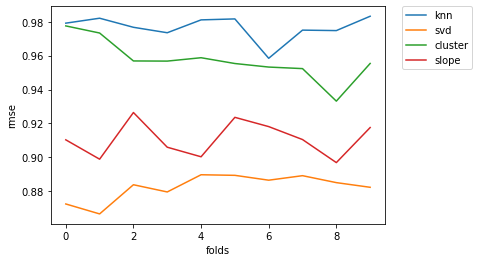

In [25]:
#plotting the prediction data:
import matplotlib.pyplot as plt

plt.plot(rmseKNN,label='knn')
plt.plot(rmseSVD,label='svd')
plt.plot(rmseCo,label='cluster')
plt.plot(rmseSlope,label='slope')

modelPrediction = plt.xlabel('folds')
modelPrediction = plt.ylabel('rmse')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [22]:
class HybridFacto(surprise.AlgoBase):
    def __init__(self,epochs, learning_rate, num_models):
        surprise.AlgoBase.__init__(self)
        self.alpha = np.array([1/num_models]*num_models)
        self.epochs = epochs
        self.learning_rate = np.array([learning_rate]*num_models)
        self.thres = np.array([0.001]*num_models)
    
    def fit(self,holdout):
        surprise.AlgoBase.fit(self, trainset)
        holdout=holdout.build_full_trainset().build_testset()
        for epoch in range(self.epochs):
            predictions_ = [collabKNN.test(holdout),funkSVD.test(holdout),
                            coClus.test(holdout),slopeOne.test(holdout)]
            maeGradient = [surprise.accuracy.mae(item) for item in predictions_]
            newalpha = self.alpha - self.learning_rate * maeGradient  
            #convergence check:
            if np.any((newalpha - self.alpha) < self.thres):
                break
            self.alpha = newalpha
        return self
            
    def estimate(self,u,i):
        if not (self.trainset.knows_user(u) and self.trainset.knows_item(i)):
            raise PredictionImpossible('User and/or item is unkown.')
        algoResults = np.array([np.array(collabKNN.predict(u,i).est),np.array(funkSVD.predict(u,i).est),
                                np.array(coClus.predict(u,i).est),np.array(slopeOne.predict(u,i).est)])
        return np.sum(np.dot(self.alpha,algoResults))

In [23]:
hybrid = HybridFacto(epochs=10,learning_rate=0.05,num_models=4)
hybrid.fit(holdout)
rmseHyb = []
for trainset, testset in kSplit.split(data): #iterate through the folds.
    predhybrid = hybrid.test(testset)
    rmseHyb.append(surprise.accuracy.rmse(predhybrid))

MAE:  0.7560
MAE:  0.6779
MAE:  0.7443
MAE:  0.6965
RMSE: 1.1543
RMSE: 1.1388
RMSE: 1.1364
RMSE: 1.1457
RMSE: 1.1603
RMSE: 1.1434
RMSE: 1.1500
RMSE: 1.1564
RMSE: 1.1545
RMSE: 1.1424


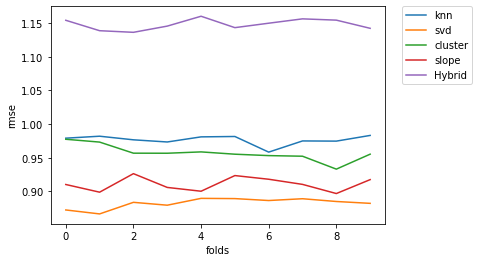

In [26]:
#plotting the prediction data:
plt.plot(rmseKNN,label='knn')
plt.plot(rmseSVD,label='svd')
plt.plot(rmseCo,label='cluster')
plt.plot(rmseSlope,label='slope')
plt.plot(rmseHyb,label='Hybrid')

modelPrediction = plt.xlabel('folds')
modelPrediction = plt.ylabel('rmse')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Гибрид на 100k выборке неэффективен.